In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)
from tqdm import tqdm
import seaborn as sns

In [2]:
sns.set()

In [3]:
def plot(title, *args):
    plt.figure(figsize=(20, 10), dpi=200)
    for arg in args:
        plt.plot(arg)
    plt.title(title)
    plt.show()
def plot_sc(title, colors, *args):
    plt.figure(figsize=(20, 10), dpi=200)
    for arg in enumerate(args):
        plt.plot(arg[1], c=colors[0])
    plt.title(title)
    plt.show()

In [4]:
df = pd.read_csv('st_ts.txt',index_col='id')

In [5]:
df = df.T
df.index = pd.to_datetime(df.index)
df.columns = [f'item{x}' for x in df.columns]
df.head()

item0  item1  item2  item3  item4  item5  item6  item7  item8  \
2017-08-28      2      3      0      0      1      0      0      0      1   
2017-09-04      3      2      0      5      1      0      0      4      1   
2017-09-11      0      0      0      3      1      0      0      7      1   
2017-09-18      0      1      0      2     15      0      0      7      1   
2017-09-25      2      0      0      1      0      0      0      6      8   

            item9  ...  item163208760122  item163208760123  item163208760124  \
2017-08-28      0  ...                 1                 0                 0   
2017-09-04      0  ...                 0                 0                 0   
2017-09-11      0  ...                 0                 1                 0   
2017-09-18      1  ...                 0                 0                 0   
2017-09-25      0  ...                 0                 0                 1   

            item163208760125  item163208760126  item163208760127  \
2017-08-28                 0                 0                 1   
2017-09-04                 0                 0                 0   
2017-09-11                 0                 2                 0   
2017-09-18                 1                 0                 1   
2017-09-25                 0                 0                 0   

            item163208760128  item163208760129  item163208760130  \
2017-08-28                 0                 0                 0   
2017-09-04                 2                 0                 0   
2017-09-11                 7                 0                 0   
2017-09-18                 1                 0                 0   
2017-09-25                 0                 0                 0   

            item163208760131  
2017-08-28                 0  
2017-09-04                 0  
2017-09-11                 0  
2017-09-18                 0  
2017-09-25                 0  

[5 rows x 58424 columns]

In [6]:
plot('example', df[df.columns[:10]])

In [7]:
from sklearn.cluster import KMeans
cluster_num = 6

In [8]:
clasters_wf = KMeans(n_clusters=cluster_num, random_state=0).fit_predict(df.T)

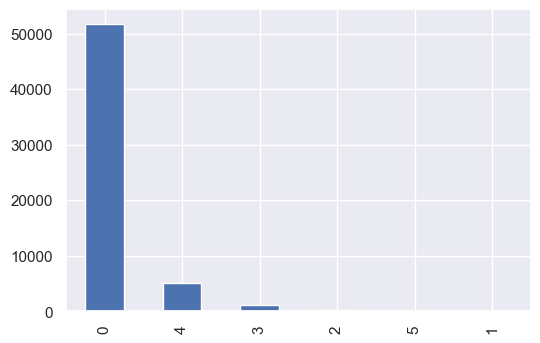

0    51797
4     5078
3     1198
2      287
5       55
1        9
dtype: int64

In [9]:
plt.figure(dpi=100)
pd.Series(clasters_wf).value_counts().plot.bar()
plt.show()
pd.Series(clasters_wf).value_counts()

In [10]:
n_plot = 3

In [11]:
res = []
for cluster in range(cluster_num):
    res.append(np.where(clasters_wf == cluster)[0][:200])
ind = np.array(res)

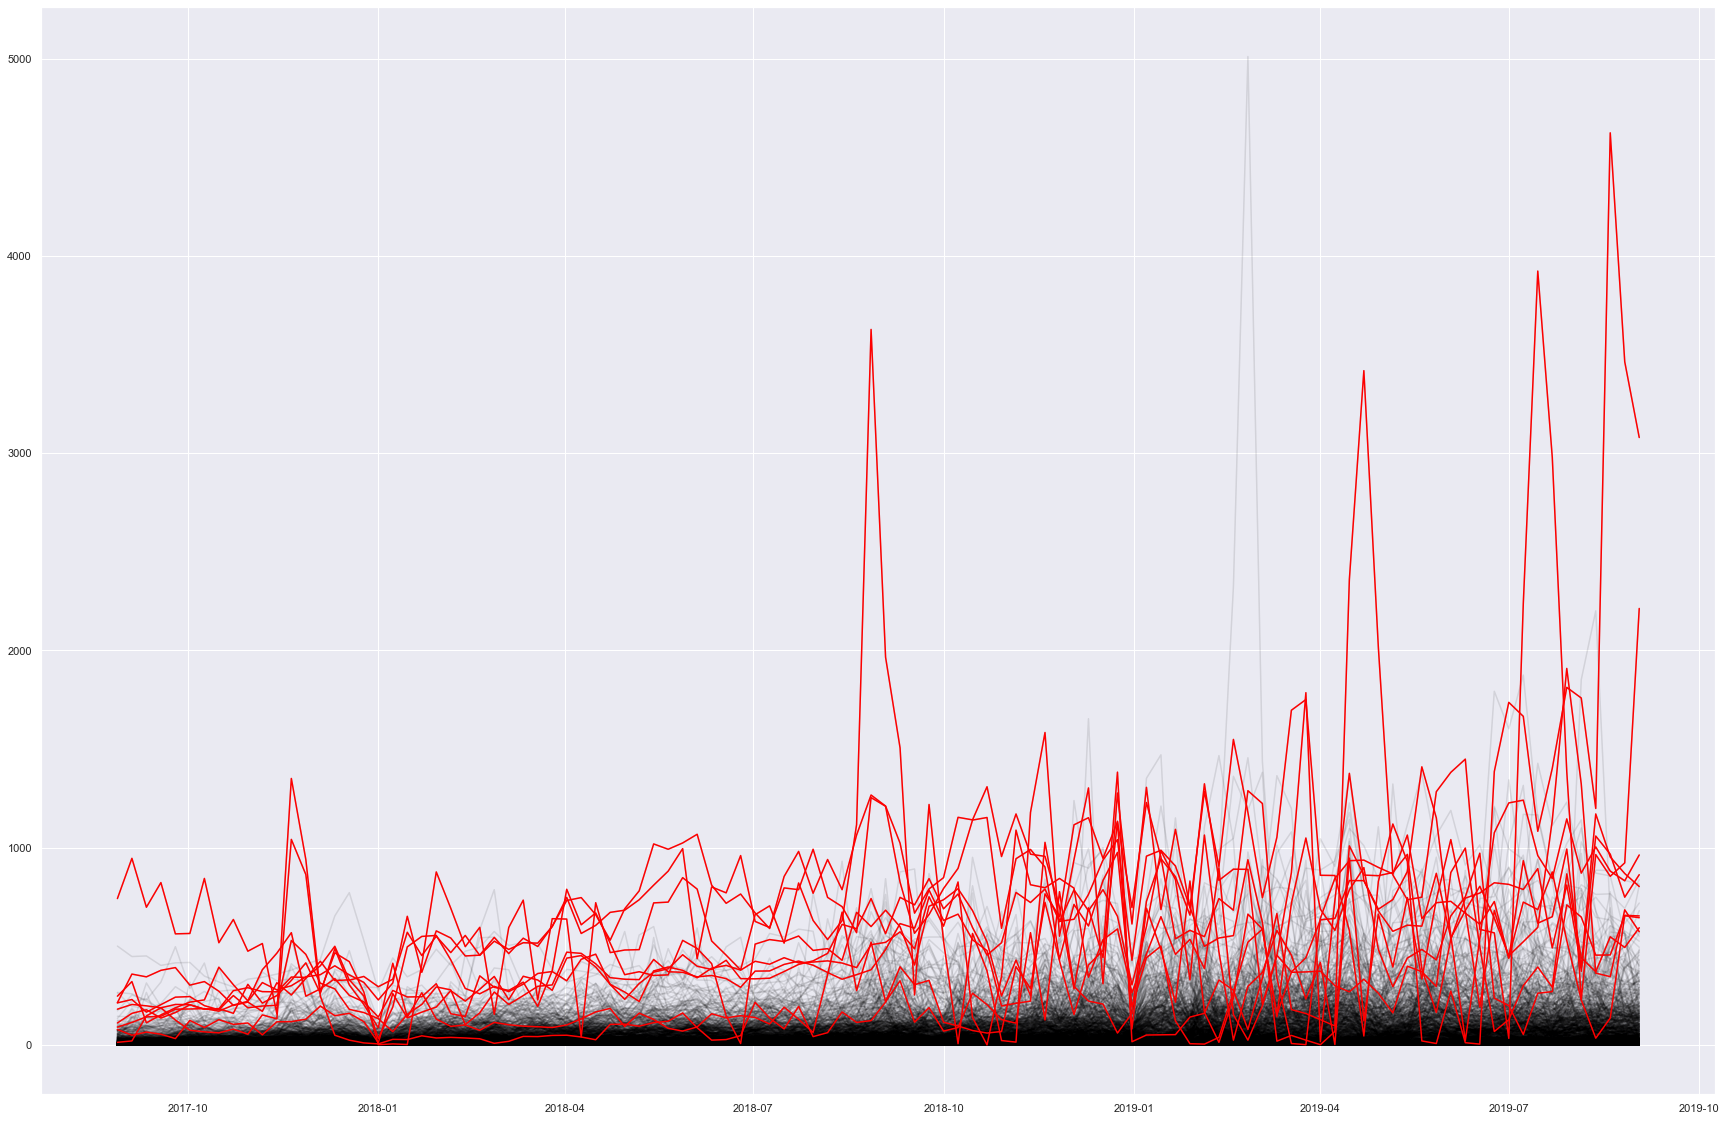

In [12]:
plt.figure(figsize=(30, 20))
for i in enumerate(ind):
    plt.plot(df.iloc[:, i[1]], c='black', alpha=0.1)
# plt.plot(df.iloc[:, ind[0]], c='red')
plt.plot(df.iloc[:, ind[1]], c='red')
# plt.plot(df.iloc[:, ind[2]], c='red')
# plt.plot(df.iloc[:, ind[3]], c='red')
# plt.plot(df.iloc[:, ind[4]], c='red')
# plt.plot(df.iloc[:, ind[5]], c='red')
plt.show()

In [13]:
df_std = df.expanding().std()
df_std = df_std.fillna(0)

In [14]:
clasters_s = KMeans(n_clusters=cluster_num, random_state=0).fit_predict(df_std.T)

In [28]:
pd.Series(clasters_s).value_counts()

0    50767
2     6064
4     1241
1      286
3       57
5        9
dtype: int64

In [16]:
res = []
for cluster in range(cluster_num):
    res.append(np.where(clasters_s == cluster)[0][:200])
ind = np.array(res)

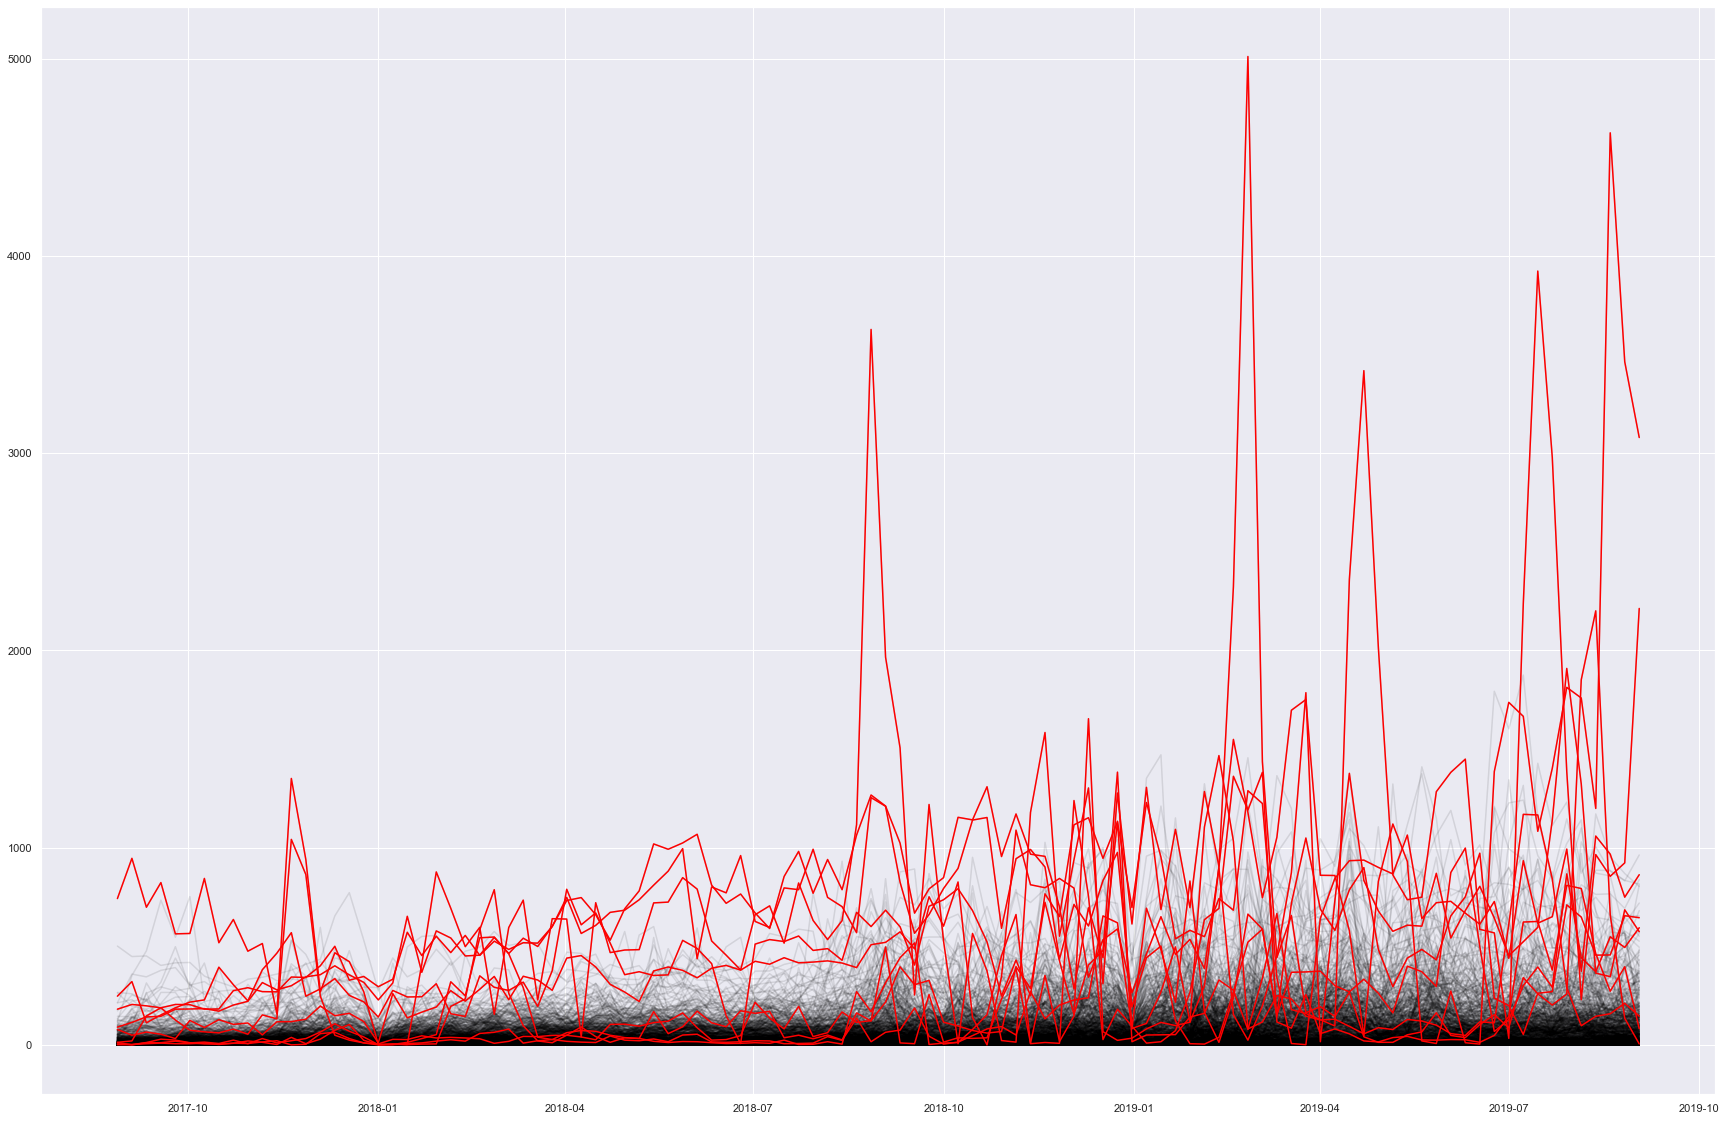

In [17]:
plt.figure(figsize=(30, 20))
for i in enumerate(ind):
    plt.plot(df.iloc[:, i[1]], c='black', alpha=0.1)
plt.plot(df.iloc[:, ind[5]], c='red')
plt.show()

In [18]:
rolling_df = df.rolling('30D').mean()
rolling_df = rolling_df.fillna(0)

In [19]:
clasters_rm = KMeans(n_clusters=cluster_num, random_state=0).fit_predict(rolling_df.T)

In [27]:
pd.Series(clasters_rm).value_counts()

5    51925
0     4987
4     1165
1      285
2       51
3       11
dtype: int64

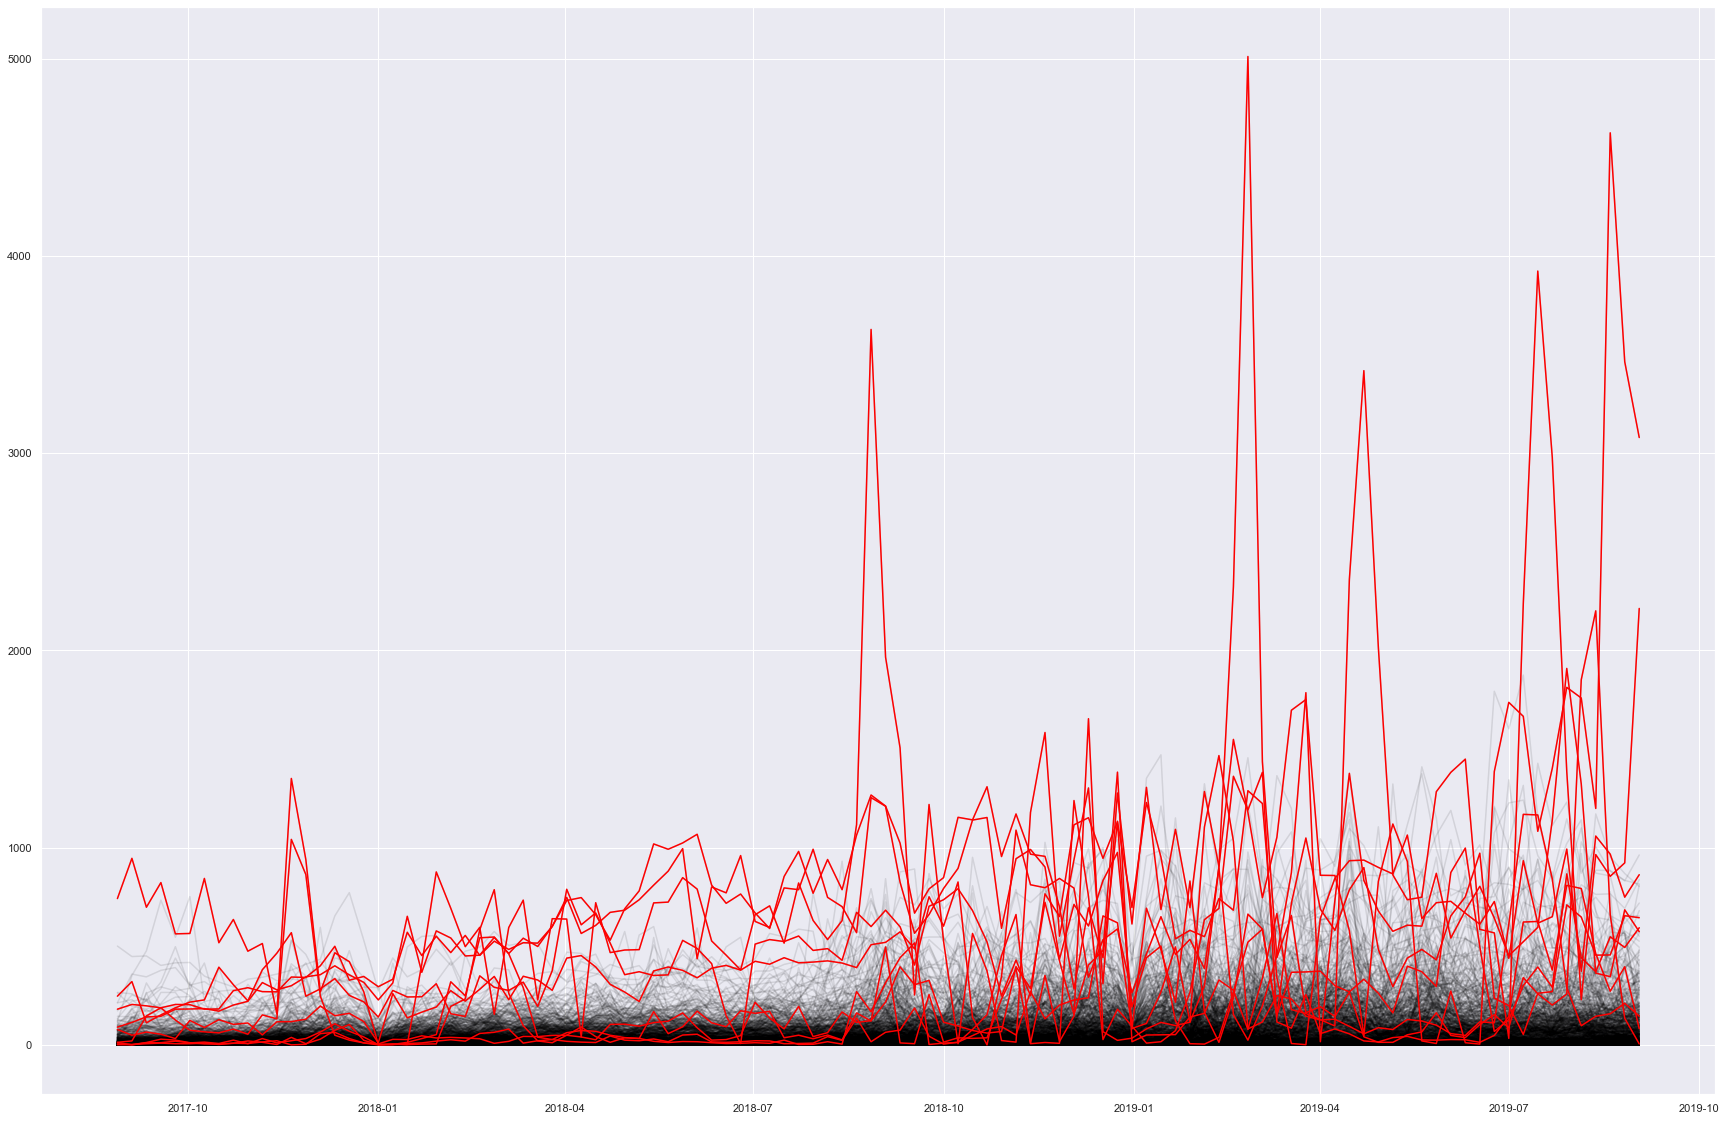

In [26]:
plt.figure(figsize=(30, 20))
for i in enumerate(ind):
    plt.plot(df.iloc[:, i[1]], c='black', alpha=0.1)
plt.plot(df.iloc[:, ind[5]], c='red')
plt.show()